In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
df = pd.read_csv('C:\\Users\\Cyber World\\Documents\\GitHub\\Student-Stress-Prediction\\Stress_Dataset.csv')

In [3]:
df.head()  # Display the first few rows of the dataset

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
df.isnull().sum()  # Check for missing values in the dataset

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [5]:
df.dtypes

Gender                                                                   int64
Age                                                                      int64
Have you recently experienced stress in your life?                       int64
Have you noticed a rapid heartbeat or palpitations?                      int64
Have you been dealing with anxiety or tension recently?                  int64
Do you face any sleep problems or difficulties falling asleep?           int64
Have you been dealing with anxiety or tension recently?.1                int64
Have you been getting headaches more often than usual?                   int64
Do you get irritated easily?                                             int64
Do you have trouble concentrating on your academic tasks?                int64
Have you been feeling sadness or low mood?                               int64
Have you been experiencing any illness or health issues?                 int64
Do you often feel lonely or isolated?               

In [6]:
df.columns  # List all columns in the dataset

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

In [10]:
df.duplicated().sum()  # Check for duplicate rows in the dataset

np.int64(27)

In [11]:
df = df.loc[:, ~df.columns.duplicated()]

In [13]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Which type of stress do you primarily experience?':
        df[col] = le.fit_transform(df[col])

# Encode the target label separately
df['Stress_Type'] = le.fit_transform(df['Which type of stress do you primarily experience?'])
df = df.drop('Which type of stress do you primarily experience?', axis=1)


In [14]:
X = df.drop('Stress_Type', axis=1)
y = df['Stress_Type']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9349112426035503
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.93      1.00      0.97       156
           2       0.00      0.00      0.00         7

    accuracy                           0.93       169
   macro avg       0.64      0.44      0.49       169
weighted avg       0.90      0.93      0.91       169



c:\Users\Cyber World\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber World\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber World\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [20]:
model.score(X_test, y_test)

0.9349112426035503

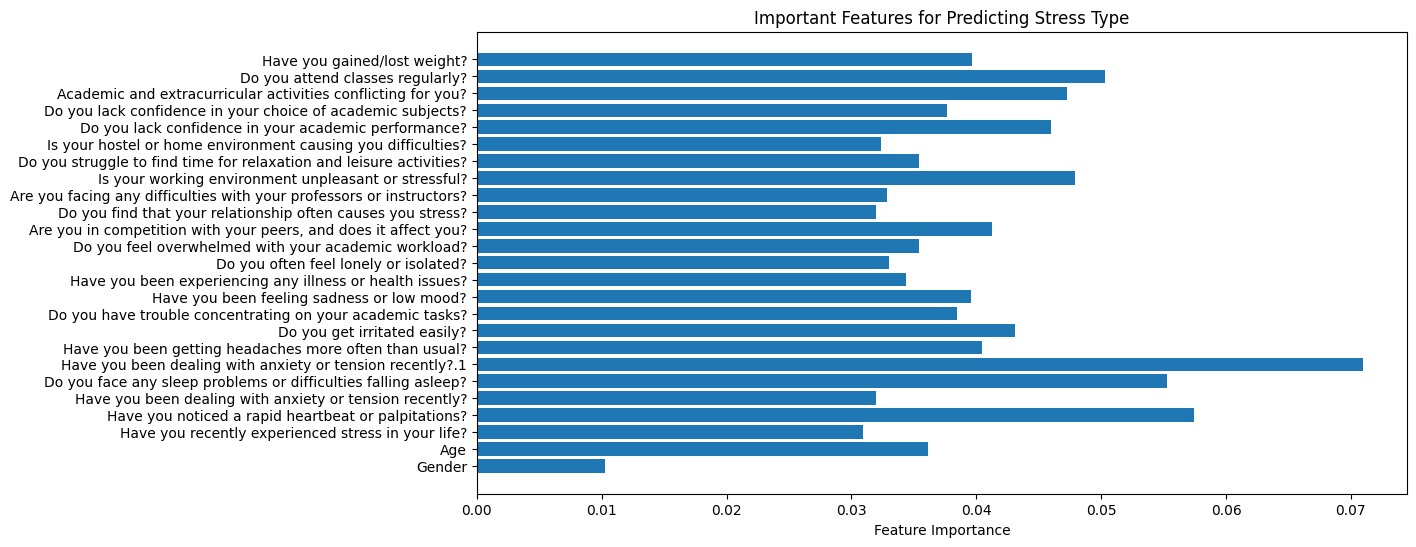

In [21]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Important Features for Predicting Stress Type")
plt.show()


In [22]:
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
